<a class="anchor" id="0"></a>
# **A Reference Guide to Feature Engineering Methods**


Hello friends,


**Feature Engineering** is the heart of any machine learning model. The success of any machine learning model depends on application of various feature engineering techniques. So, in this kernel, I will discuss various **Feature Engineering** techniques that will help us to properly extract, prepare and engineer features from our dataset.

So, let's get started.

- This kernel is based on Soledad Galli's course - [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/) and her article - [Feature Engineering for Machine Learning ; A Comprehensive Overview](https://www.trainindata.com/post/feature-engineering-comprehensive-overview).

- She had done a fabulous job in her above course wherein she had put all the major feature engineering techniques  together at one place. I have adapted code and instructions from her course and article in this kernel. I like to congratulate her for her excellent work.

**I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be very much appreciated**

<a class="anchor" id="0.1"></a>
## Table of Contents


1.	[Introduction to Feature Engineering](#1)
2.	[Overview of Feature Engineering techniques](#2)
3.	[Missing data imputation](#3)
   - 3.1	[Complete Case Analysis](#3.1)
   - 3.2	[Mean/Median/Mode imputation](#3.2)
   - 3.3	[Random Sample imputation](#3.3)
   - 3.4	[Replacement by arbitrary value](#3.4)
   - 3.5	[End of distribution imputation](#3.5)
   - 3.6	[Missing value indicator](#3.6)
4.	[Categorical encoding](#4) 
   - 4.1	[One-Hot Encoding (OHE)](#4.1)
   - 4.2	[Ordinal Encoding](#4.2)
   - 4.3	[Count and Frequency Encoding](#4.3)
   - 4.4	[Target/Mean Encoding](#4.4)
   - 4.5	[Weight of evidence](#4.5)
5.	[Variable Transformation](#5)
   - 5.1	[Logarithmic Transformation](#5.1)
   - 5.2	[Reciprocal Transformation](#5.2)
   - 5.3	[Square-root Transformation](#5.3)
   - 5.4	[Exponential Transformation](#5.4)
   - 5.5	[Box-Cox Transformation](#5.5)
6.	[Discretization](#6)
   - 6.1    [Equal width discretization with pandas cut function](#6.1)
   - 6.2    [Equal frequency discretization with pandas qcut function](#6.2)
   - 6.3    [Domain knowledge discretization](#6.3)
7.   [Outlier Engineering](#7)
   - 7.1    [Outlier removal](#7.1)
   - 7.2    [Treating outliers as missing values](#7.2)
   - 7.3    [Discretization](#7.3)
   - 7.4    [Top/bottom/zero coding](#7.4)
8. [Data and Time Engineering](#8)
9. [References](#9)









# **1. Introduction to Feature Engineering** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In terms of Wikipedia website :

**Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself**

Source : https://en.wikipedia.org/wiki/Feature_engineering


Another important definition of Feature Engineering is as follows:-

**Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.**

— Andrew Ng, Machine Learning and AI via Brain simulations


- So, feature engineering is the process of creating useful features in a machine learning model. We can see that the success of any machine-learning model depends on the application of various feature engineering techniques.

# **2. Overview of Feature Engineering techniques** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- **Feature engineering** is a very broad term that consists of different techniques to process data. These techniques help us to process our raw data into processed data ready to be fed into a machine learning algorithm. These techniques include filling missing values, encode categorical variables, variable transformation, create new variables from existing ones and others.

 
- In this section, I will list the main feature engineering techniques to process the data. In the following sections, I will describe each technique and its applications. 


- The feature engineering techniques that we will discuss in this kernel are as follows:-


1. Missing data imputation
2. Categorical encoding
3. Variable transformation
4. Discretization
6. Outlier engineering
7. Date and time engineering

# **3. Missing data imputation**  <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


- Missing data, or Missing values, occur when no data / no value is stored for a certain observation within a variable.

- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. Incomplete data is an unavoidable problem in dealing with most data sources.


- **Imputation** is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

 
- There are multiple techniques for missing data imputation. These are as follows:-

  1. Complete case analysis

  2. Mean / Median / Mode imputation

  3. Random Sample Imputation

  4. Replacement by Arbitrary Value

  5. End of Distribution Imputation

  6. Missing Value Indicator
  
  7. Multivariate imputation

## **Missing Data Mechanisms**

- There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.

#### **Missing Completely at Random, MCAR**

- A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

- If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.

#### **Missing at Random, MAR**

- MAR occurs when there is a systematic relationship between the propensity of missing values and the observed data. In other words, the probability an observation being missing depends only on available information (other variables in the dataset). For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for those men and women that decided not to disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

- In a situation like the above, if we decide to proceed with the variable with missing values (in this case weight), we might benefit from including gender to control the bias in weight for the missing observations.

#### **Missing Not at Random, MNAR**

- Missing of values is not at random (MNAR) if their being missing depends on information not recorded in the dataset. In other words, there is a mechanism or a reason why missing values are introduced in the dataset.

## **3.1 Complete Case Analysis (CCA) ** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)


- **Complete case analysis** implies analysing only those observations in the dataset that contain values in all the variables. In other words, in complete case analysis we remove all observations with missing values. This procedure is suitable when there are few observations with missing data in the dataset. 

- **So complete-case analysis (CCA)**, also called list-wise deletion of cases, consists in simply discarding observations where values in any of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in all of the variables (Xs).

- But, if the dataset contains missing data across multiple variables, or some variables contain a high proportion of missing observations, we can easily remove a big chunk of the dataset, and this is undesirable. 

- CCA can be applied to both categorical and numerical variables.

- In practice, CCA may be an acceptable method when the amount of missing information is small. In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option.

## **CCA on Titanic dataset**

- Now, I will demonstrate the application of CCA on titanic dataset.

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [19]:
# load the dataset
titanic = pd.read_csv('titanic_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

In [14]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
# make a copy of titanic dataset
data1 = titanic.copy()

NameError: name 'titanic' is not defined

In [ ]:
 # check the percentage of missing values per variable

data1.isnull().mean()

- Now, if we chose to remove all the missing observations, we would end up with a very small dataset, given that Cabin is missing for 77% of the observations. 

In [6]:
# check how many observations we would drop
print('total passengers with values in all variables: ', data1.dropna().shape[0])
print('total passengers in the Titanic: ', data1.shape[0])
print('percentage of data without missing values: ', data1.dropna().shape[0]/ np.float(data1.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


- So, we have complete information for only 20% of our observations in the Titanic dataset. Thus, CCA would not be an option for this dataset.

- So, in datasets with many variables that contain missing data, CCA will typically not be an option as it will produce a reduced dataset with complete observations. However, if only a subset of the variables from the dataset will be used, we could evaluate variable by variable, whether we choose to discard values with NA, or to replace them with other methods.

## **3.2 Mean / Median / Mode Imputation** <a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)

- We can replace missing values with the mean, median or mode of the variable. Mean / median / mode imputation is widely adopted in organisations and data competitions. Although in practice this technique is used in almost every situation, the procedure is suitable if data is missing at random and in small proportions. If there are a lot of missing observations, however, we will distort the distribution of the variable, as well as its relationship with other variables in the dataset. Distortion in the variable distribution may affect the performance of linear models. 

- Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

- For categorical variables, replacement by the mode, is also known as replacement by the most frequent category.

- Mean/median imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, we can think of replacing the NA with the most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

- The rationale is to replace the population of missing values with the most frequent value, since this is the most likely occurrence.

- When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations (since the imputed values do not differ from the mean or from each other). Therefore leading to underestimation of the variance.

- In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. This is because we may be destroying intrinsic correlations since the mean/median that now replace NA will not preserve the relation with the remaining variables.

## **Mean / Median / Mode Imputation on Titanic dataset**

In [7]:
# make a copy of titanic dataset
data2 = titanic.copy()

In [8]:
# check the percentage of NA values in dataset

data2.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Important Note**

- Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

- In the titanic dataset, we can see that `Age` contains 19.8653%, `Cabin` contains 77.10% and `Embarked` contains 0.22% of missing values. 

### **Imputation of Age variable**

- `Age` is a continuous variable. First, we will check the distribution of `age` variable.

Text(0.5, 0, 'Age')

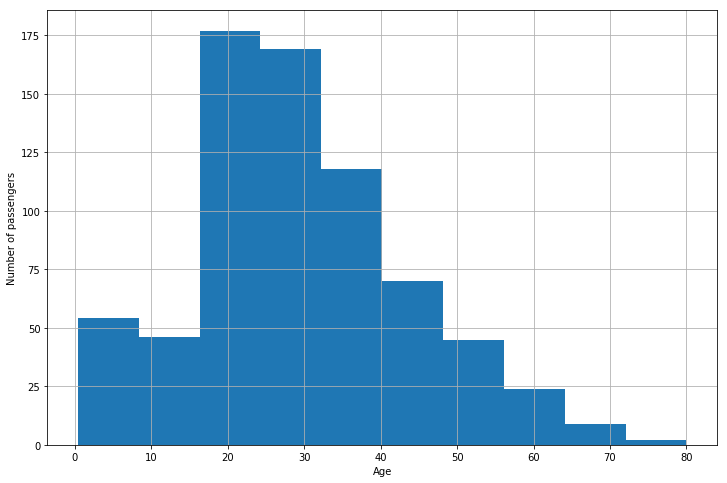

In [9]:
# plot the distribution of age to find out if they are Gaussian or skewed.

plt.figure(figsize=(12,8))
fig = data2.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

- We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [10]:
# separate dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, data2.Survived, test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [11]:
# calculate median of Age
median = X_train.Age.median()
median

29.0

In [12]:
# impute missing values in age in train and test set

for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

### **Check for missing values in `age` variable**

In [13]:
X_train['Age'].isnull().sum()

0

In [14]:
X_test['Age'].isnull().sum()

0

- We can see that there are no missing values in `age` variable in the train and test set.

- We can follow along same lines and fill missing values in `Cabin` and `Embarked` with the most frequent value.

- **Mean/Median/Mode imputation** is the most common method to impute missing values.

## **3.3 Random Sample imputation** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1)

- Random sample imputation refers to randomly selecting values from the variable to replace the missing data. This technique preserves the variable distribution, and is well suited for data missing at random. But, we need to account for randomness by adequately setting a seed. Otherwise, the same missing observation could be replaced by different values in different code runs, and therefore lead to a different model predictions. This is not desirable when using our models within an organisation.

- Replacing of NA by random sampling for categorical variables is exactly the same as for numerical variables.

- Random sampling consist of taking a random observation from the pool of available observations of the variable, that is, from the pool of available categories, and using that randomly extracted value to fill the NA. In Random Sampling one takes as many random observations as missing values are present in the variable.

- By random sampling observations of the present categories, we guarantee that the frequency of the different categories/labels within the variable is preserved.

### Assumptions

- Random sample imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, it makes sense to substitute the missing values, by values extracted from the original variable distribution/ category frequency.
 

## **Random Sample imputation on Titanic dataset**

In [15]:
# make a copy of titanic dataset

data3 = titanic.copy()

In [16]:
# check the percentage of NA values

data3.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Important Note**

Imputation should be done over the training set, and then propagated to the test set. This means that the random sample to be used to fill missing values both in train and test set, should be extracted from the train set.

In [17]:
# separate dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data3, data3.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [18]:
# write a function to create 3 variables from Age:

def impute_na(df, variable, median):
    
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    # fill with random-sample
    df[variable+'_random_sample'] = df[variable].fillna(random_sample)

In [19]:
impute_na(X_train, 'Age', median)

In [20]:
impute_na(X_test, 'Age', median)

## **3.4 Replacement by Arbitrary Value** <a class="anchor" id="3.4"></a>

[Table of Contents](#0.1)

- Replacement by an arbitrary value, as its names indicates, refers to replacing missing data by any, arbitrarily determined value, but the same value for all missing data. Replacement by an arbitrary value is suitable if data is not missing at random, or if there is a huge proportion of missing values. If all values are positive, a typical replacement is -1. Alternatively, replacing by 999 or -999 are common practice. We need to anticipate that these arbitrary values are not a common occurrence in the variable. Replacement by arbitrary values however may not be suited for linear models, as it most likely will distort the distribution of the variables, and therefore model assumptions may not be met.

 
- For categorical variables, this is the equivalent of replacing missing observations with the label “Missing” which is a widely adopted procedure.

- Replacing the NA by artitrary values should be used when there are reasons to believe that the NA are not missing at random. In situations like this, we would not like to replace with the median or the mean, and therefore make the NA look like the majority of our observations.

- Instead, we want to flag them. We want to capture the missingness somehow.

## **Replacement by Arbitrary Value on Titanic dataset**

In [21]:
# make a copy of titanic dataset

data4 = titanic.copy()

In [22]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data4, data4.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [23]:
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [24]:
# replace NA with the median value in the training and test set
impute_na(X_train, 'Age')
impute_na(X_test, 'Age')


- The arbitrary value has to be determined for each variable specifically. For example, for this dataset, the choice of replacing NA in age by 0 or 100 are valid, because none of those values are frequent in the original distribution of the variable, and they lie at the tails of the distribution.

- However, if we were to replace NA in fare, those values are not good any more, because we can see that fare can take values of up to 500. So we might want to consider using 500 or 1000 to replace NA instead of 100.

- We can see that this is totally arbitrary. But, it is used in the industry. Typical values chosen by companies are -9999 or 9999, or similar.

## **3.5 End of Distribution Imputation** <a class="anchor" id="3.5"></a>

[Table of Contents](#0.1)

- End of tail imputation involves replacing missing values by a value at the far end of the tail of the variable distribution. This technique is similar in essence to imputing by an arbitrary value. However, by placing the value at the end of the distribution, we need not look at each variable distribution individually, as the algorithm does it automatically for us. This imputation technique tends to work well with tree-based algorithms, but it may affect the performance of linear models, as it distorts the variable distribution.

- On occasions, one has reasons to suspect that missing values are not missing at random. And if the value is missing, there has to be a reason for it. Therefore, we would like to capture this information.

- Adding an additional variable indicating missingness may help with this task. However, the values are still missing in the original variable, and they need to be replaced if we plan to use the variable in machine learning.

- So, we will replace the NA, by values that are at the far end of the distribution of the variable.

- The rationale is that if the value is missing, it has to be for a reason, therefore, we would not like to replace missing values for the mean and make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

## **End of Distribution Imputation on Titanic dataset**

In [25]:
# make a copy of titanic dataset

data5 = titanic.copy()

In [26]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data5, data5.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

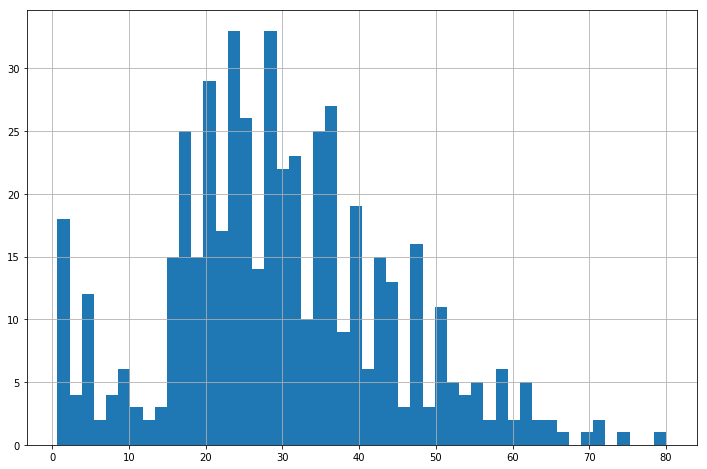

In [27]:
plt.figure(figsize=(12,8))
X_train.Age.hist(bins=50)

In [28]:
# at far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918366

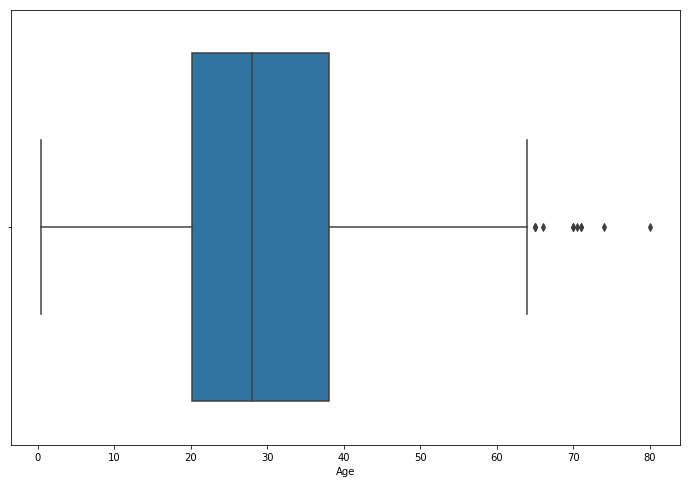

In [29]:
# we can see that there are a few outliers for Age
# according to its distribution, these outliers will be masked when we replace NA by values at the far end 

plt.figure(figsize=(12,8))
sns.boxplot('Age', data=data5)

In [30]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [31]:
# let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())

## **3.6 Missing Value Indicator** <a class="anchor" id="3.6"></a>

[Table of Contents](#0.1)

- The missing indicator technique involves adding a binary variable to indicate whether the value is missing for a certain observation. This variable takes the value 1 if the observation is missing, or 0 otherwise. One thing to notice is that we still need to replace the missing values in the original variable, which we tend to do with mean or median imputation. By using these 2 techniques together, if the missing value has predictive power, it will be captured by the missing indicator, and if it doesn’t it will be masked by the mean / median imputation. 

- These 2 techniques in combination tend to work well with linear models. But, adding a missing indicator expands the feature space and, as multiple variables tend to have missing values for the same observations, many of these newly created binary variables could be identical or highly correlated.

## **Missing Value Indicator on Titanic dataset**

In [32]:
# make a copy of titanic dataset

data6 = titanic.copy()

In [33]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data6, data6.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [34]:
# create variable indicating missingness

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [35]:
# we can see that mean and median are similar. So I will replace with the median

X_train.Age.mean(), X_train.Age.median()

(29.915338645418327, 29.0)

In [36]:
# let's replace the NA with the median value in the training set
X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,0


- We can see that another variable `Age_NA` is created to capture the missingness.

## **Conclusion - When to use each imputation method**


- If missing values are less than 5% of the variable, then go for mean/median imputation or random sample replacement. Impute by most frequent category if missing values are more than 5% of the variable. Do mean/median imputation+adding an additional binary variable to capture missingness add a 'Missing' label in categorical variables.

- If the number of NA in a variable is small, they are unlikely to have a strong impact on the variable / target that you are trying to predict. Therefore, treating them specially, will most certainly add noise to the variables. Therefore, it is more useful to replace by mean/random sample to preserve the variable distribution.

- If the variable / target you are trying to predict is however highly unbalanced, then it might be the case that this small number of NA are indeed informative. 

#### Exceptions

- If we suspect that NAs are not missing at random and do not want to attribute the most common occurrence to NA, and if we don't want to increase the feature space by adding an additional variable to indicate missingness - in these cases, replace by a value at the far end of the distribution or an arbitrary value.

# **4. Categorical Encoding** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


- Categorical data is data that takes only a limited number of values.

- For example, if you people responded to a survey about which what brand of car they owned, the result would be categorical (because the answers would be things like Honda, Toyota, Ford, None, etc.). Responses fall into a fixed set of categories.

- You will get an error if you try to plug these variables into most machine learning models in Python without "encoding" them first. Here we'll show the most popular method for encoding categorical variables.


- Categorical variable encoding is a broad term for collective techniques used to transform the strings or labels of categorical variables into numbers. There are multiple techniques under this method:

  1. One-Hot encoding (OHE)
  
  2. Ordinal encoding

  3. Count and Frequency encoding

  4. Target encoding / Mean encoding

  5. Weight of Evidence

  6. Rare label encoding

## **4.1 One-Hot Encoding (OHE) ** <a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)
 

- OHE is the standard approach to encode categorical data.

- One hot encoding (OHE) creates a binary variable for each one of the different categories present in a variable. These binary variables take 1 if the observation shows a certain category or 0 otherwise. OHE is suitable for linear models. But, OHE expands the feature space quite dramatically if the categorical variables are highly cardinal, or if there are many categorical variables. In addition, many of the derived dummy variables could be highly correlated.

- OHE, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation. Each one of the boolean variables are also known as dummy variables or binary variables.

- For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise.

In [37]:
# make a copy of titanic dataset

data7 = titanic.copy()

In [38]:
data7['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [39]:
# one hot encoding

pd.get_dummies(data7['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [40]:
# for better visualisation
pd.concat([data7['Sex'], pd.get_dummies(data7['Sex'])], axis=1).head()

,Sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


- We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

- To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows :-

In [41]:
# obtaining k-1 labels
pd.get_dummies(data7['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
# Let's now look at an example with more than 2 labels

data7['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [43]:
# check the number of different labels
data7.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
# get whole set of dummy variables

pd.get_dummies(data7['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [45]:
# get k-1 dummy variables

pd.get_dummies(data7['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


- Scikt-Learn API provides a class for [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

- Also, I will introduce you to a wide range of encoding options from the [Category Encoders package](https://contrib.scikit-learn.org/categorical-encoding/) for use with scikit-learn in Python. 

- Both of the above options can also be used for One-Hot Encoding.

## **Important Note regarding OHE**

- Scikit-learn's [one hot encoder class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) only takes numerical categorical values. So, any value of string type should be label encoded first before one hot encoded.

- In the titanic example, the gender of the passengers has to be label encoded first before being one-hot encoded using Scikit-learn's one hot encoder class.

## **4.2 Ordinal encoding** <a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)


- Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

  - Student's grade in an exam (A, B, C or Fail).
  - Days of the week can be ordinal with Monday = 1, and Sunday = 7.
  - Educational level, with the categories: Elementary school, High school, College graduate, PhD ranked from 1 to 4.
   
- When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

- In ordinal encoding we replace the categories by digits, either arbitrarily or in an informed manner. If we encode categories arbitrarily, we assign an integer per category from 1 to n, where n is the number of unique categories. If instead, we assign the integers in an informed manner, we observe the target distribution: we order the categories from 1 to n, assigning 1 to the category for which the observations show the highest mean of target value, and n to the category with the lowest target mean value.

- We can use [Category Encoders Package](https://contrib.scikit-learn.org/categorical-encoding/) to perform ordinal encoding. Please consult the documentation for more information.


## **4.3 Count and Frequency Encoding** <a class="anchor" id="4.3"></a>

[Table of Contents](#0.1)


- In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. 

- This approach is heavily used in Kaggle competitions, wherein we replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The two methods are equivalent.

In [46]:
#import dataset
df_train = pd.read_csv('/kaggle/input/mercedesbenz-greener-manufacturing/train.csv')
                       

df_test = pd.read_csv('/kaggle/input/mercedesbenz-greener-manufacturing/test.csv') 
                      

In [47]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [48]:
# let's have a look at how many labels

for col in df_train.columns[3:9]:
    print(col, ': ', len(df_train[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) over the training set, and then use those numbers to replace the labels in the test set.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], df_train.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [50]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

{'as': 1155,
 'ae': 342,
 'ai': 289,
 'm': 284,
 'ak': 188,
 'r': 101,
 'n': 97,
 's': 63,
 'e': 61,
 'f': 59,
 'aq': 46,
 'ay': 40,
 'a': 34,
 't': 17,
 'k': 16,
 'i': 15,
 'ag': 15,
 'z': 14,
 'd': 12,
 'b': 12,
 'ac': 10,
 'ao': 10,
 'g': 10,
 'y': 8,
 'x': 8,
 'at': 5,
 'ap': 5,
 'h': 4,
 'q': 3,
 'ah': 3,
 'al': 3,
 'an': 3,
 'au': 3,
 'av': 2,
 'aw': 2,
 'aa': 1,
 'l': 1,
 'p': 1,
 'c': 1,
 'af': 1,
 'o': 1,
 'am': 1}

In [51]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [52]:
# now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


Where in the original dataset, for the observation 1 in the variable 2 before it was 'ai', now it was replaced by the count 289. And so on for the rest of the categories.

## **4.4 Target / Mean Encoding** <a class="anchor" id="4.4"></a>

[Table of Contents](#0.1)


- In target encoding, also called mean encoding, we replace each category of a variable, by the mean value of the target for the observations that show a certain category. For example, we have the categorical variable “city”, and we want to predict if the customer will buy a TV provided we send a letter. If 30 percent of the people in the city “London” buy the TV, we would replace London by 0.3.


- This technique has 3 advantages:

  1. it does not expand the feature space,

  2. it captures some information regarding the target at the time of encoding the category, and

  3. it creates a monotonic relationship between the variable and the target. 
  

- Monotonic relationships between variable and target tend to improve linear model performance.

 

In [53]:
# let's load again the titanic dataset

data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [54]:
# let's fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [55]:
# check number of different labels in Cabin

len(data.Cabin.unique())

148

In [56]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [57]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### **Important**

- The risk factor should be calculated per label considering only on the training set, and then expanded it to the test set.

In [58]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [59]:
# let's calculate the target frequency for each label

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [60]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [61]:
# replace the labels with the 'risk' (target frequency)
# note that we calculated the frequencies based on the training set only

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [62]:
# view results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


Text(0, 0.5, 'Survived')

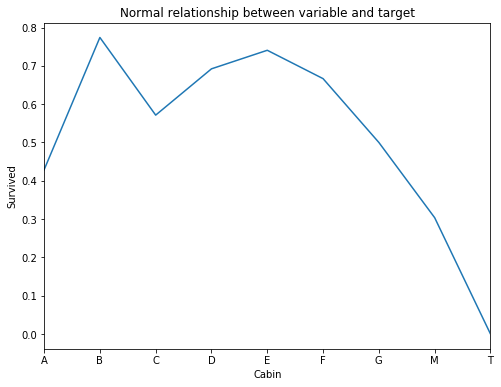

In [63]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

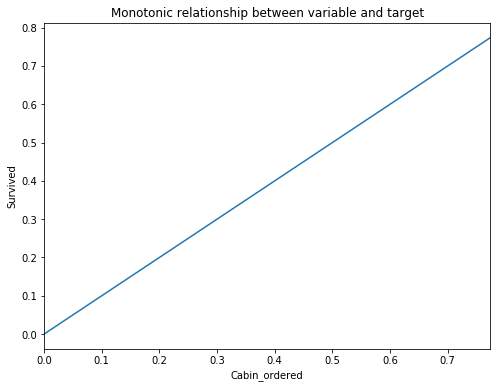

In [64]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

## **4.5 Weight of evidence** <a class="anchor" id="4.5"></a>

[Table of Contents](#0.1)


- Weight of evidence (WOE) is a technique used to encode categorical variables for classification. WOE is the natural logarithm of the probability of the target being 1 divided the probability of the target being 0. WOE has the property that its value will be 0 if the phenomenon is random; it will be bigger than 0 if the probability of the target being 0 is bigger, and it will be smaller than 0 when the probability of the target being 1 is greater.

- WOE transformation creates a nice visual representation of the variable, because by looking at the WOE encoded variable, we can see, category by category, whether it favours the outcome of 0, or of 1. In addition, WOE creates a monotonic relationship between variable and target, and leaves all the variables within the same value range.

In [65]:
# preview X_train

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


In [66]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [67]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [68]:
# and now the probability of target = 0 
# and we add it to the dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [69]:
# since the log of zero is not defined, let's set this number to something small and non-zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [70]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [71]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [72]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [73]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [74]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


Text(0, 0.5, 'Survived')

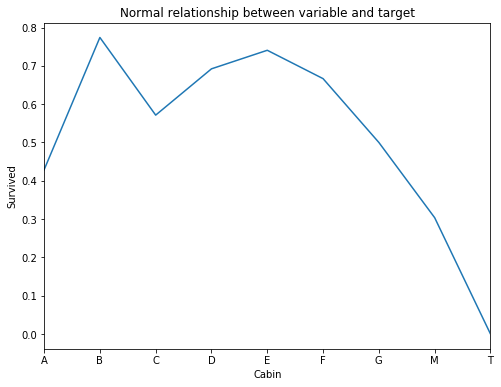

In [75]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

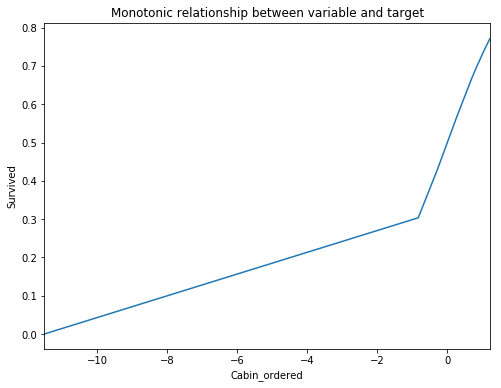

In [76]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

We can see in the above plot, there is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

# **5. Variable Transformation** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Others benefit from **Gaussian-like** distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.

- If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian. Typically used mathematical transformations are:

 
  1. Logarithm transformation - log(x)

  2. Reciprocal transformation - 1 / x

  3. Square root transformation - sqrt(x)

  4. Exponential transformation - exp(x)

  5. Box-Cox transformation  
  
- Now, let's demonstrate the above transformations on the titanic dataset.

In [77]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### **Fill missing data with random sample**

In [78]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [79]:
# fill na
data['Age'] = impute_na(data, 'Age')

## **Age**


### **Original distribution**


- We can visualise the distribution of the `Age` variable, by plotting a histogram and the Q-Q plot.

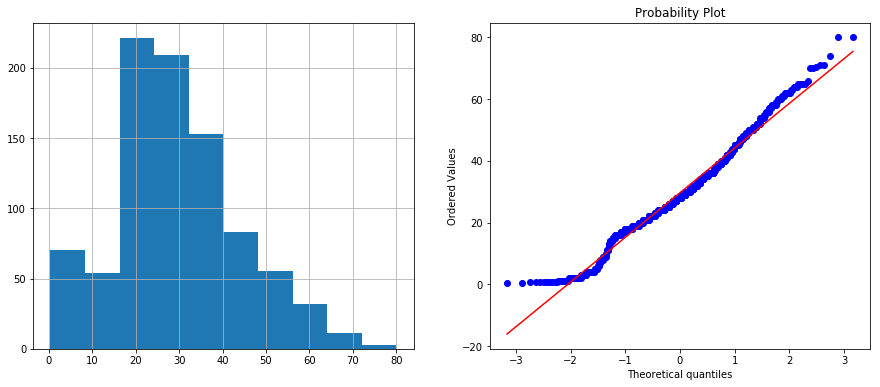

In [80]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')

- The variable `Age` is almost normally distributed, except for some observations on the lower value tail of the distribution. Note the slight skew to the left in the histogram, and the deviation from the straight line towards the lower values in the Q-Q- plot. 

- In the following cells, I will apply the above mentioned transformations and compare the distributions of the transformed `Age` variable.

## **5.1 Logarithmic transformation** <a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)

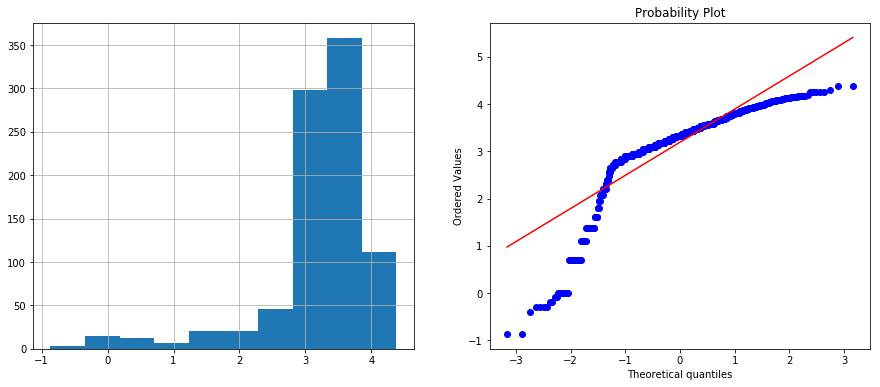

In [81]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

- The logarithmic transformation, did not produce a Gaussian like distribution for Age.

## **5.2 Reciprocal transformation** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)

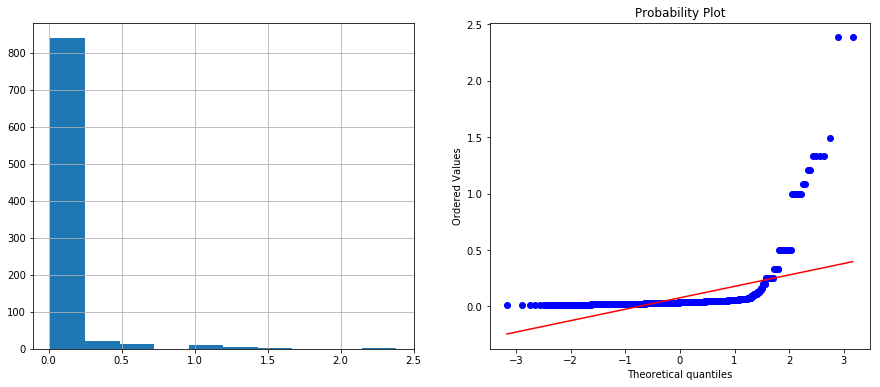

In [82]:
### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

diagnostic_plots(data, 'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

## **5.3 Square root transformation** <a class="anchor" id="5.3"></a>

[Table of Contents](#0.1)

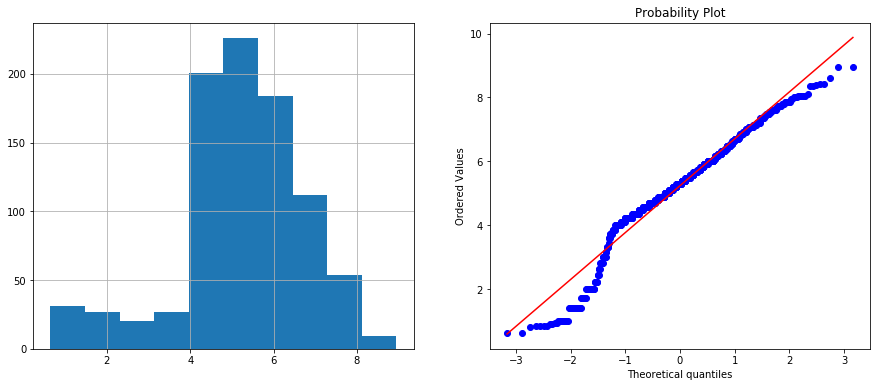

In [83]:
data['Age_sqr'] =data.Age**(1/2)

diagnostic_plots(data, 'Age_sqr')

The square root transformation is a bit more succesful that the previous two transformations. However, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.

## **5.4 Exponential Transformation** <a class="anchor" id="5.4"></a>

[Table of Contents](#0.1)

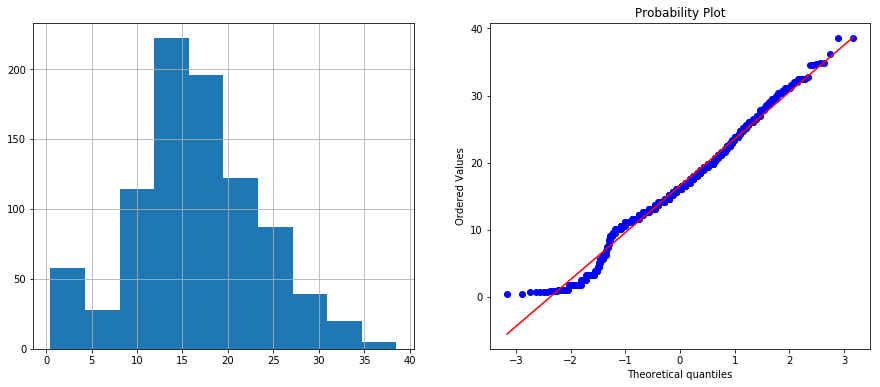

In [84]:
data['Age_exp'] = data.Age**(1/1.2) 

diagnostic_plots(data, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, we can say that the transformed variable follows more closely a Gaussian distribution.

## **5.5 BoxCox transformation** <a class="anchor" id="5.5"></a>

[Table of Contents](#0.1)


- The Box-Cox transformation is defined as: 

     T(Y)=(Y exp(λ)−1)/λ

- where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

- Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

- The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

- In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

- We can proceed as follows -

Optimal λ:  0.7648522500282625


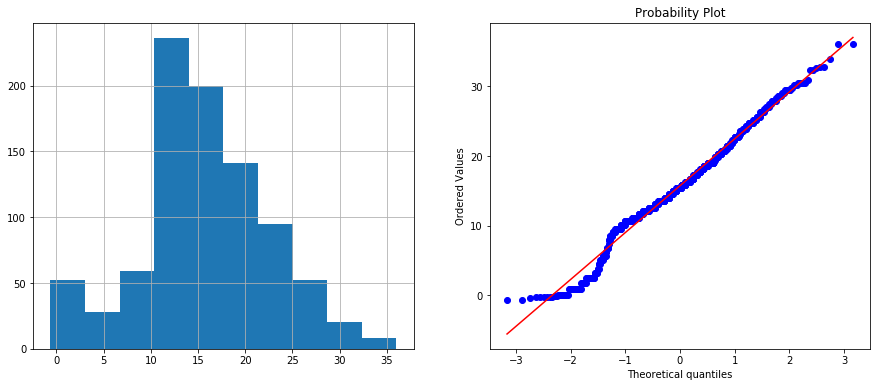

In [85]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

The Box Cox transformation was as good as the exponential transformation we performed above to make Age look more Gaussian. Whether we decide to proceed with the original variable or the transformed variable, will depend of the purpose of the exercise.

# **6. Discretization** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- **Discretisation** is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values.

### Discretisation helps handle outliers and highly skewed variables

- **Discretisation** helps handle outliers by placing these values into the lower or higher intervals together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.

- There are several approaches to transform continuous variables into discrete ones. This process is also known as **binning**, with each bin being each  interval. 

- **Discretisation** refers to sorting the values of the variable into bins or intervals, also called buckets. There are multiple ways to discretise variables:
 

  1. Equal width discretisation

  2. Equal Frequency discretisation
  
  3. Domain knowledge discretisation

  4. Discretisation using decision trees

## **Discretising data with pandas cut and qcut functions**

- When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. Pandas supports these approaches using the **cut** and **qcut** functions.

- **cut** command creates equispaced bins but frequency of samples is unequal in each bin.

- **qcut** command creates unequal size bins but frequency of samples is equal in each bin.

- The following diagram illustrates the point :-

![Discretising data with pandas cut and qcut](https://i.stack.imgur.com/pObHa.png)

## **6.1 Equal width discretisation with pandas cut function** <a class="anchor" id="6.1"></a>

[Table of Contents](#0.1)


- Equal width binning divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable.

  width = (max value - min value) / N

- For example if the values of the variable vary between 0 and 100, we create 5 bins like this: width = (100-0) / 5 = 20. The bins thus are 0-20, 20-40, 40-60, 80-100. The first and final bins (0-20 and 80-100) can be expanded to accommodate outliers (that is, values under 0 or greater than 100 would be placed in those bins as well).

- There is no rule of thumb to define N. Typically, we would not want more than 10.

- Source : https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html


In [86]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [87]:
# equal width discretisation with cut 
pd.cut(x, bins = 3, labels = ["bad", "medium", "good"]).value_counts() #Bins size has equal interval of 9   

bad       2
medium    0
good      4
dtype: int64

## **6.2 Equal frequency discretisation with pandas qcut function** <a class="anchor" id="6.2"></a>

[Table of Contents](#0.1)

- Equal frequency binning divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. Typically, we find the interval boundaries by determining the quantiles.

- Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user. There is no rule of thumb to define N. However, if we think of the discrete variable as a categorical variable, where each bin is a category, we would like to keep N (the number of categories) low (typically no more than 10).

- Source : https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html

In [88]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [89]:
# equal frequency discretisation with qcut 
pd.qcut(x, q = 3, labels = ["bad", "medium", "good"]).value_counts() #Equal frequency of 2 in each bins

bad       2
medium    2
good      2
dtype: int64

## **6.3 Domain knowledge discretisation** <a class="anchor" id="6.3"></a>

[Table of Contents](#0.1)

- Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. These intervals may be defined both arbitrarily or following some criteria of use to the business. Typical examples are the discretisation of variables like Age and Income. 

- Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.

In [90]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols = ['Age', 'Survived'])
data.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


The variable Age contains missing data, that I will fill by extracting a random sample of the variable.

In [91]:
def impute_na(data, variable):
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [92]:
# let's fill the missing data
data['Age'] = impute_na(data, 'Age')

In [93]:
data['Age'].isnull().sum()

0

In [94]:
# let's divide age into the buckets 

# bucket boundaries
buckets = [0,20,40,60,100]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
pd.cut(data.Age, bins = buckets, labels = labels, include_lowest=True).value_counts()

20-40    486
0-20     221
40-60    156
>60       28
Name: Age, dtype: int64

In [95]:
# create two new columns after discretisation

data['Age_buckets_labels'] = pd.cut(data.Age, bins=buckets, labels = labels, include_lowest=True)
data['Age_buckets'] = pd.cut(data.Age, bins=buckets, include_lowest=True)

data.head()

,Survived,Age,Age_buckets_labels,Age_buckets
0,0,22.0,20-40,"(20.0, 40.0]"
1,1,38.0,20-40,"(20.0, 40.0]"
2,1,26.0,20-40,"(20.0, 40.0]"
3,1,35.0,20-40,"(20.0, 40.0]"
4,0,35.0,20-40,"(20.0, 40.0]"


In [96]:
data.tail()

,Survived,Age,Age_buckets_labels,Age_buckets
886,0,27.0,20-40,"(20.0, 40.0]"
887,1,19.0,0-20,"(-0.001, 20.0]"
888,0,15.0,0-20,"(-0.001, 20.0]"
889,1,26.0,20-40,"(20.0, 40.0]"
890,0,32.0,20-40,"(20.0, 40.0]"


- We can observe the buckets into which each Age observation was placed. For example, age 27 was placed into the 20-40 bucket.

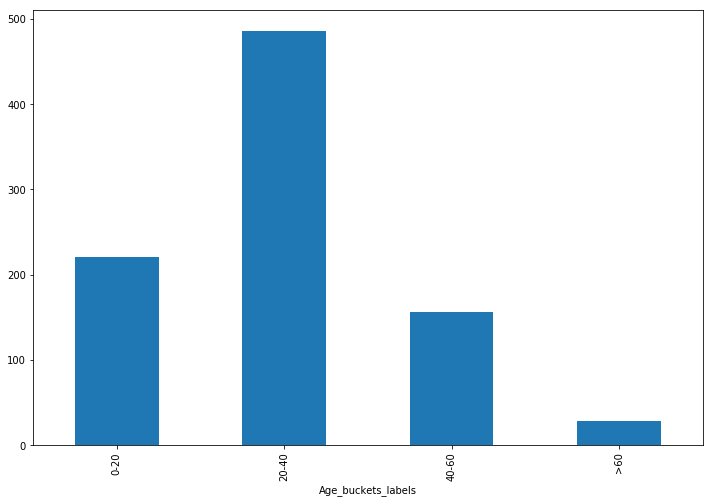

In [97]:
# number of passengers per age bucket

plt.figure(figsize=(12,8))
data.groupby('Age_buckets_labels')['Age'].count().plot.bar()

- We can see that there are different passengers in each age bucket label.

# **7. Outlier Engineering** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


- Outliers are values that are unusually high or unusually low respect to the rest of the observations of the variable. There are a few techniques for outlier handling:

  1. Outlier removal

  2. Treating outliers as missing values

  3. Discretisation

  4. Top / bottom / zero coding
 

### **Identifying outliers**

#### **Extreme Value Analysis**

- The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

- In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

- If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

- IQR = 75th quantile - 25th quantile

- An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

## **7.1 Outlier removal** <a class="anchor" id="7.1"></a>

[Table of Contents](#0.1)


- Outlier removal refers to removing outlier observations from the dataset. Outliers, by nature are not abundant, so this procedure should not distort the dataset dramatically. But if there are outliers across multiple variables, we may end up removing a big portion of the dataset.

## **7.2 Treating outliers as missing values** <a class="anchor" id="7.2"></a>

[Table of Contents](#0.1)

- We can treat outliers as missing information, and carry on any of the imputation methods described earlier in this kernel.

 

## **7.3 Discretisation** <a class="anchor" id="7.3"></a>

[Table of Contents](#0.1)

- Discretisation handles outliers automatically, as outliers are sorted into the terminal bins, together with the other higher or lower value observations. The best approaches are equal frequency and tree based discretisation.

## **7.4 Top /bottom / zero coding** <a class="anchor" id="7.4"></a>

[Table of Contents](#0.1)

- Top or bottom coding are also known as **Winsorisation** or **outlier capping**. The procedure involves capping the maximum and minimum values at a predefined value. This predefined value can be arbitrary, or it can be derived from the variable distribution.

- If the variable is normally distributed we can cap the maximum and minimum values at the mean plus or minus 3 times the standard deviation. If the variable is skewed, we can use the inter-quantile range proximity rule or cap at the top and bottom percentiles.

- This is demonstrated using the titanic dataset below:-

 



In [98]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv', usecols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### **Top-coding important**

Top-coding and bottom-coding, as any other feature pre-processing step, should be determined over the training set, and then transferred onto the test set. This means that we should find the upper and lower bounds in the training set only, and use those bands to cap  the values in the test set.

In [99]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

### **Outliers in continuous variables**

- We can see that `Age` and `Fare` are continuous variables. So, first I will cap the outliers in those variables.

Text(0, 0.5, 'Fare')

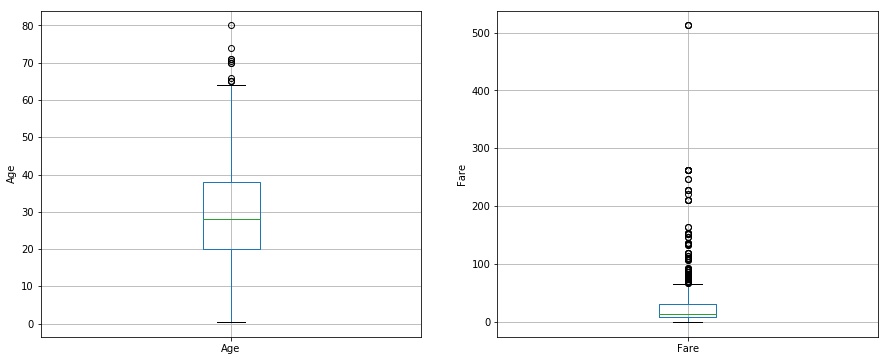

In [100]:
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')

- Both Age and Fare contain outliers. Let's find which valuers are the outliers.

Text(0.5, 0, 'Fare')

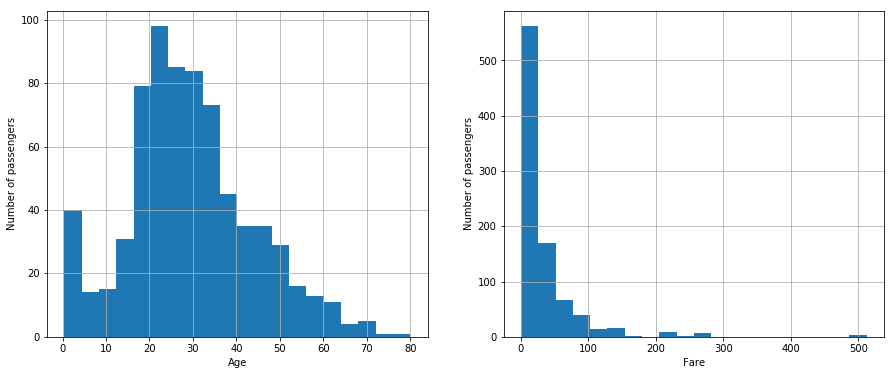

In [101]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare.

In [102]:
# find outliers

# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -13.88037434994331 or > 73.27860964406095
Fare outliers are values < -61.358399999999996 or > 100.2688


### **Age**

- For Age variable the outliers lie only on the right of the distribution. Therefore we only need to introduce top-coding.

In [103]:
# view the statistical summary of Age
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [104]:
# Assuming normality

Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.43632005918366

In [105]:
# top-coding the Age variable

X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

(73.0, 70.5)

### **Fare**

- The outliers, according to the above plot, lie all at the right side of the distribution. This is, some people paid extremely high prices for their tickets. Therefore, in this variable, only extremely high values will affect the performance of our machine learning models, and we need to do therefore top-coding. 

In [106]:
# view statistical properties of Fare

X_train.Fare.describe()

count    623.000000
mean      32.458273
std       48.257658
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: Fare, dtype: float64

In [107]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

100.6563

The upper boundary, above which every value is considered an outlier is a cost of 100 dollars for the Fare.

In [108]:
# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

(100.0, 100.0)

Thus we deal with outliers from a machine learning perspective.

# **8. Date and Time Engineering** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


Date variables are special type of categorical variable. By their own nature, date variables will contain a multitude of different labels, each one corresponding to a specific date and sometimes time. Date variables, when preprocessed properly can highly enrich a dataset. For example, from a date variable we can extract:

- Month
- Quarter
- Semester
- Day (number)
- Day of the week
- Is Weekend?
- Hr
- Time differences in years, months, days, hrs, etc.


It is important to understand that date variables should not be used as the categorical variables we have been working so far when building a machine learning model. Not only because they have a multitude of categories, but also because when we actually use the model to score a new observation, this observation will most likely be in the future, an therefore its date label, will be different than the ones contained in the training set and therefore the ones used to train the machine learning algorithm.


- I will use the lending club dataset for demonstration -

In [109]:
# let's load the Lending Club dataset with selected columns and rows

use_cols = ['issue_d', 'last_pymnt_d']
data = pd.read_csv('/kaggle/input/lending-club-loan-data/loan.csv', usecols=use_cols, nrows=10000)
data.head()

,issue_d,last_pymnt_d
0,Dec-2018,Feb-2019
1,Dec-2018,Feb-2019
2,Dec-2018,Feb-2019
3,Dec-2018,Feb-2019
4,Dec-2018,Feb-2019


In [110]:
# now let's parse the dates, currently coded as strings, into datetime format

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d','issue_dt','last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2018,2018-12-01,Feb-2019,2019-02-01
1,Dec-2018,2018-12-01,Feb-2019,2019-02-01
2,Dec-2018,2018-12-01,Feb-2019,2019-02-01
3,Dec-2018,2018-12-01,Feb-2019,2019-02-01
4,Dec-2018,2018-12-01,Feb-2019,2019-02-01


In [111]:
# Extracting Month from date

data['issue_dt_month'] = data['issue_dt'].dt.month

data[['issue_dt', 'issue_dt_month']].head()

,issue_dt,issue_dt_month
0,2018-12-01,12
1,2018-12-01,12
2,2018-12-01,12
3,2018-12-01,12
4,2018-12-01,12


In [112]:
data[['issue_dt', 'issue_dt_month']].tail()

,issue_dt,issue_dt_month
9995,2018-12-01,12
9996,2018-12-01,12
9997,2018-12-01,12
9998,2018-12-01,12
9999,2018-12-01,12


In [113]:
# Extract quarter from date variable

data['issue_dt_quarter'] = data['issue_dt'].dt.quarter

data[['issue_dt', 'issue_dt_quarter']].head()

,issue_dt,issue_dt_quarter
0,2018-12-01,4
1,2018-12-01,4
2,2018-12-01,4
3,2018-12-01,4
4,2018-12-01,4


In [114]:
data[['issue_dt', 'issue_dt_quarter']].tail()

,issue_dt,issue_dt_quarter
9995,2018-12-01,4
9996,2018-12-01,4
9997,2018-12-01,4
9998,2018-12-01,4
9999,2018-12-01,4


In [115]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.issue_dt_quarter.isin([1,2]),1,2)
data.head()

,issue_d,last_pymnt_d,issue_dt,last_pymnt_dt,issue_dt_month,issue_dt_quarter,issue_dt_semester
0,Dec-2018,Feb-2019,2018-12-01,2019-02-01,12,4,2
1,Dec-2018,Feb-2019,2018-12-01,2019-02-01,12,4,2
2,Dec-2018,Feb-2019,2018-12-01,2019-02-01,12,4,2
3,Dec-2018,Feb-2019,2018-12-01,2019-02-01,12,4,2
4,Dec-2018,Feb-2019,2018-12-01,2019-02-01,12,4,2


In [116]:
# day - numeric from 1-31

data['issue_dt_day'] = data['issue_dt'].dt.day

data[['issue_dt', 'issue_dt_day']].head()

,issue_dt,issue_dt_day
0,2018-12-01,1
1,2018-12-01,1
2,2018-12-01,1
3,2018-12-01,1
4,2018-12-01,1


In [117]:
# day of the week - from 0 to 6

data['issue_dt_dayofweek'] = data['issue_dt'].dt.dayofweek

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2018-12-01,5
1,2018-12-01,5
2,2018-12-01,5
3,2018-12-01,5
4,2018-12-01,5


In [118]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2018-12-01,5
9996,2018-12-01,5
9997,2018-12-01,5
9998,2018-12-01,5
9999,2018-12-01,5


In [119]:
# day of the week - name

data['issue_dt_dayofweek'] = data['issue_dt'].dt.weekday_name

data[['issue_dt', 'issue_dt_dayofweek']].head()

,issue_dt,issue_dt_dayofweek
0,2018-12-01,Saturday
1,2018-12-01,Saturday
2,2018-12-01,Saturday
3,2018-12-01,Saturday
4,2018-12-01,Saturday


In [120]:
data[['issue_dt', 'issue_dt_dayofweek']].tail()

,issue_dt,issue_dt_dayofweek
9995,2018-12-01,Saturday
9996,2018-12-01,Saturday
9997,2018-12-01,Saturday
9998,2018-12-01,Saturday
9999,2018-12-01,Saturday


In [121]:
# was the application done on the weekend?

data['issue_dt_is_weekend'] = np.where(data['issue_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2018-12-01,Saturday,1
1,2018-12-01,Saturday,1
2,2018-12-01,Saturday,1
3,2018-12-01,Saturday,1
4,2018-12-01,Saturday,1


In [122]:
data[data.issue_dt_is_weekend==1][['issue_dt', 'issue_dt_dayofweek','issue_dt_is_weekend']].head()

,issue_dt,issue_dt_dayofweek,issue_dt_is_weekend
0,2018-12-01,Saturday,1
1,2018-12-01,Saturday,1
2,2018-12-01,Saturday,1
3,2018-12-01,Saturday,1
4,2018-12-01,Saturday,1


In [123]:
# extract year 

data['issue_dt_year'] = data['issue_dt'].dt.year

data[['issue_dt', 'issue_dt_year']].head()

,issue_dt,issue_dt_year
0,2018-12-01,2018
1,2018-12-01,2018
2,2018-12-01,2018
3,2018-12-01,2018
4,2018-12-01,2018


In [124]:
# extract the date difference between 2 dates

data['issue_dt'] - data['last_pymnt_dt']

0      -62 days
1      -62 days
2      -62 days
3      -62 days
4      -62 days
         ...   
9995   -62 days
9996   -62 days
9997   -62 days
9998   -62 days
9999   -62 days
Length: 10000, dtype: timedelta64[ns]

# **9. References** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


This kernel is based on -

1. Soledad Galli's course - [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/) , and 

2. Her article - [Feature Engineering for Machine Learning ; A Comprehensive Overview](https://www.trainindata.com/post/feature-engineering-comprehensive-overview).



[Go to Top](#0)